[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/TobGerken/ISAT300/blob/main/4_TemperatureResponseLabReview.ipynb)

# Temperature Response Lab Review


**This notebook is published on my github. It is publicly accessible, but you cannot save your changes to my github. Learning git & github is beyond the scope of this course. If you are familiar with github, you know that to do. If you don't know github, you can save a personal copy of the file to your google drive, so that you can save your changes and can access them at a later date**

This notebook is a continuation from previous classes:

1. [GettingStarted](https://github.com/TobGerken/ISAT300/blob/main/1_GettingStarted.ipynb)
2. [Data Visualization](https://github.com/TobGerken/ISAT300/blob/main/2_DataVisualization.ipynb)
3. [Heart Rate Lab Review](https://github.com/TobGerken/ISAT300/blob/main/3_HeartRateLabReview.ipynb)

## Before we start

Today's code uses the same techniques used in previous notebooks. I recommend to review this. 

**Even if you don't plan on using Python for your analysis, I expect everyone to know the concepts behind the first-order step-response and how an exponential fit can be used to approximate this.** 

In this notebook we will:

- Load lab data into a dataframe
- Plot the data as a timeseries
- Isolate the data of a single step-response (i.e. cold to hot)
- Fit an exponential model (see below) to estimate the time constant $\tau$ 
    
     **$y(t) = A + B \times e^{-([t-T]/\tau)}$**


You shoul'd definitely know how to estimate *A, B,* and *T* provided experimental data. And you should also be able to calculate $\tau$ assuming that you have *A, B, T* and data for *t* and *y(t)*. 

Because we are still suing pandas we have to import the pandas python module and we make it available with the name `pd`.
We will also be using [numpy](https://numpy.org/) a module that extends python for mathematics, science, and statistics. We import this as `np`.

In [75]:
# running this will import pandas and numpy.
import pandas as pd
import numpy as np


Reading the data

In [76]:
# Because the LabQuest meters don't provide a clean header, I am assigning the column names manually'
colnames = ['Time1','Temperature1A', 'Temperature1B', 
            'Time2','Temperature2A', 'Temperature2B', 
            'Time3','Temperature3A', 'Temperature3B']

# I am reading the data telling pandas to skip the first row and to not treat any rows in the table as headers 
df= pd.read_csv('https://raw.githubusercontent.com/TobGerken/ISAT300/main/Data/TemperatureResponse.csv',
                skiprows=1, # this skips the first row of the csv
                header=None, # this tells pandas to not treat any rows as column names
                names = colnames # this is the list of columnames to use
                )
df.head()

,Time1,Temperature1A,Temperature1B,Time2,Temperature2A,Temperature2B,Time3,Temperature3A,Temperature3B
0,0.00,0.3,0.2,0.00,0.1,0.3,0.00,0.1,0.3
1,0.01,0.2,0.2,0.01,0.1,0.2,0.01,0.1,0.3
2,0.02,0.3,0.3,0.02,0.1,0.2,0.02,0.1,0.3
3,0.03,0.2,0.1,0.03,0.1,0.2,0.03,0.1,0.3
4,0.04,0.2,0.2,0.04,0.1,0.2,0.04,0.1,0.3


One thing to note is that because all runs have a different length, they stop at different times. Missing data in the table is filled in using `NaN`, which stands for not a number. 

We can see this if we look at the end of the dataframe. The first run took longer than the others. 

In [77]:
df.tail()

,Time1,Temperature1A,Temperature1B,Time2,Temperature2A,Temperature2B,Time3,Temperature3A,Temperature3B
19177,191.77,0.3,0.4,NaN,NaN,NaN,NaN,NaN,NaN
19178,191.78,0.2,0.1,NaN,NaN,NaN,NaN,NaN,NaN
19179,191.79,0.2,0.2,NaN,NaN,NaN,NaN,NaN,NaN
19180,191.80,0.2,0.2,NaN,NaN,NaN,NaN,NaN,NaN
19181,191.81,0.2,0.2,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
# We can also see this in the df.info, where the number of non-null (i.e. rows with data is different for each run)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19182 entries, 0 to 19181
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time1          19182 non-null  float64
 1   Temperature1A  19182 non-null  float64
 2   Temperature1B  19182 non-null  float64
 3   Time2          12252 non-null  float64
 4   Temperature2A  12252 non-null  float64
 5   Temperature2B  12252 non-null  float64
 6   Time3          13772 non-null  float64
 7   Temperature3A  13772 non-null  float64
 8   Temperature3B  13772 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


It is always important to know if there is missing data. Sometimes it makes sense to just treat rows with NaNs as not existant, but in other occasions, you are not expecting missing data and having missing data would mess up your results. 

Pandas by default just skips missing data, but you can also set functions to not skip it, which then turns the results to `NaN`.

In [79]:
df.mean(skipna = True)

Time1            95.905000
Temperature1A    31.216025
Temperature1B    31.269258
Time2            61.255000
Temperature2A    44.893626
Temperature2B    47.243715
Time3            68.855000
Temperature3A    44.703631
Temperature3B    45.345033
dtype: float64

In [80]:
df.mean(skipna = False)

Time1            95.905000
Temperature1A    31.216025
Temperature1B    31.269258
Time2                  NaN
Temperature2A          NaN
Temperature2B          NaN
Time3                  NaN
Temperature3A          NaN
Temperature3B          NaN
dtype: float64

##Plot the data as a timeseries

Too see whether the experiment was successful. Let's produce a plot for the first run. 

<AxesSubplot:xlabel='Time1'>

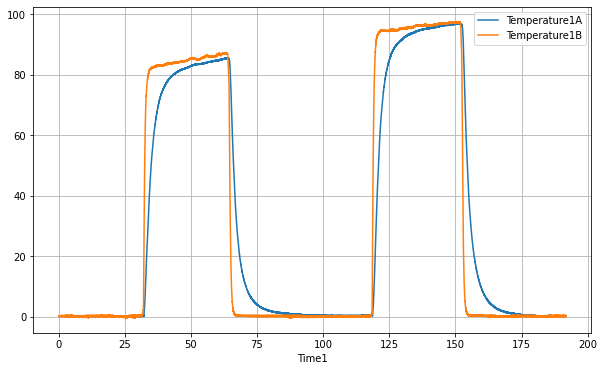

In [82]:
df[['Time1','Temperature1A','Temperature1B']].plot(x='Time1', grid = True, figsize=(10, 6))

It looks like that there are actually two runs in the first, which explains why this column is the longest.

**Q: What do you think happened here, so that the run was repeated?**


## Isolate the data
In order to fit the exponential function to the step response, we need to isolate the data. To do so, I make a copy of the dataframe for the first run.

It also looks like things are getting interesting after 110s, so we don't need any data before that. 

In [83]:
df_R1 = df[['Time1','Temperature1A','Temperature1B']] # makes a new datafram with just Run 1

In [84]:
selectedTime = df_R1['Time1']>115  # This creates a logical array, for all times greater than 110 seconds 

<AxesSubplot:xlabel='Time1'>

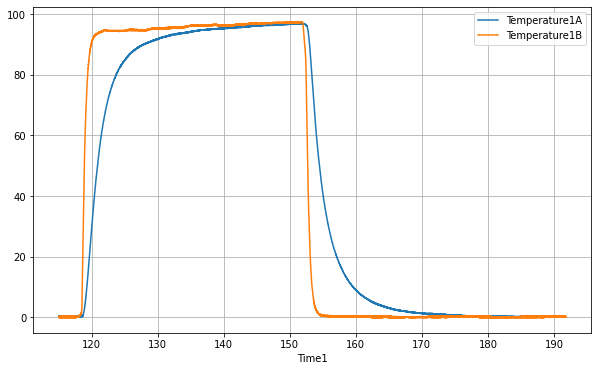

In [85]:
df_R1 = df_R1[selectedTime]
df_R1[['Time1','Temperature1A','Temperature1B']].plot(x='Time1', grid = True, figsize=(10, 6))

### Estimate the parameters for cold to hot. 

We can fit only one function at a time, so we need to separate the **_cold-to-hot_** from the **_hot-to-cold data_**. It seems that 150s might be a good time to cut this off. 

We create another copy and further refine the time stamp. 

<AxesSubplot:xlabel='Time1'>

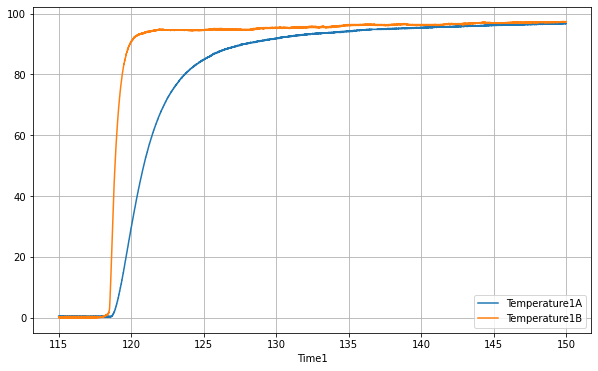

In [86]:
df_R1_c2h = df_R1[['Time1','Temperature1A','Temperature1B']]
selectedTime = df_R1_c2h['Time1']<150
df_R1_c2h = df_R1_c2h[selectedTime]
df_R1_c2h[['Time1','Temperature1A','Temperature1B']].plot(x='Time1', grid = True, figsize=(10, 6))

OK, now we can see this more clearly. Knowing what we know about the first-order response function

**$y(t) = A + B \times e^{-([t-T]/\tau)}$**

and also about the nature of $\tau$ we could already estimate values for A, B, and T and also have a guess for $\tau$

## Fitting the model

We can like last week use `curve_fit()` from the [Scipy](https://scipy.org/) package in python to our step-response function to estimate the set of fitted parameters.  

To do so we have to:

- import `curve_fit`
- define our first-order step response function
- apply the curve fit 
- use the curve fit to estimate the temperature values for plotting

In [92]:
from scipy.optimize import curve_fit

def FirstOrderResponse(t, a, b, T, tau):
    y = a + b * np.exp(-(t-T)/tau)
    y[t<T]= a+b # This is needed to enforce the step nature of the model.
    return y

# It is often a good idea to supply the first guess of the parameters, to make sure that the algorithm does not get stuck.

# First guess for values
a   = 100        # suggested starting value: 0
b   = 0-100       # suggested starting value: 100
T   = 117
tau = 3
firstGuess = [a,b,T,tau]

# We also extract time and temperature to shorten the code
t = df_R1_c2h['Time1']
y = df_R1_c2h['Temperature1A']


# We can now call again the curve_fit. 
fittedParameter, variance = curve_fit(FirstOrderResponse, t, y, firstGuess)
print(fittedParameter)

# This then applys the fit to get estimated values for Temperature
y_est_1A = FirstOrderResponse(t,fittedParameter[0],fittedParameter[1],fittedParameter[2],fittedParameter[3])


[ 95.02093458 -94.56941943 118.96988018   2.63431583]


Let's have a look at our results: 

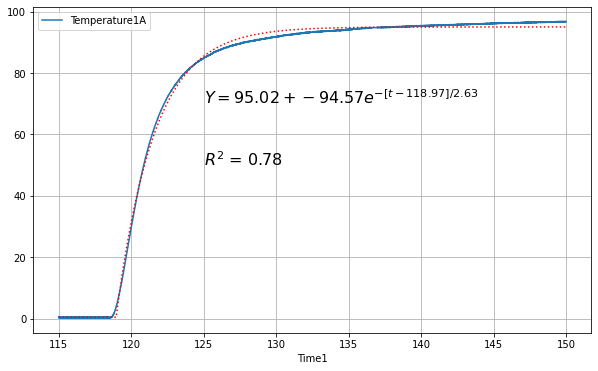

In [93]:
import matplotlib.pyplot as plt
ax1 = df_R1_c2h[['Time1','Temperature1A']].plot(x='Time1', grid = True, figsize=(10, 6))
ax1 = plt.plot(t,y_est_1A, color = 'r', linestyle=':')
ax1 = plt.text(125, 70, r"$Y = %3.2f +  %3.2f e^{- [t - %3.2f] / %3.2f }$" % (fittedParameter[0],fittedParameter[1],fittedParameter[2],fittedParameter[3]), fontsize = 16)
ax1 = plt.text(125, 50, r"$R^2$ = %3.2f" % (np.corrcoef(y,y_est)[0,1])**2 , fontsize = 16)

Text(0.5, 0, 'Measured Temperature')

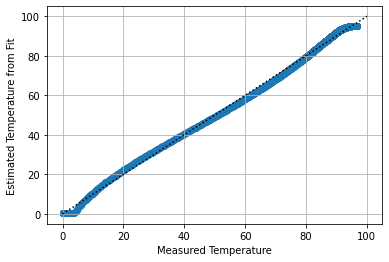

In [94]:
# Let's have a look at measured vs. estimated temperatures. 

plt.scatter(y,y_est_1A)
plt.plot([0, 100], [0,100], 'k:')
plt.grid(True)
plt.ylabel('Estimated Temperature from Fit')
plt.xlabel('Measured Temperature')

We can now do the same fit for the faster probe, by just using the `['Temperature1B']` column


[ 95.84170181 -95.56840636 118.5284584    0.49517929]


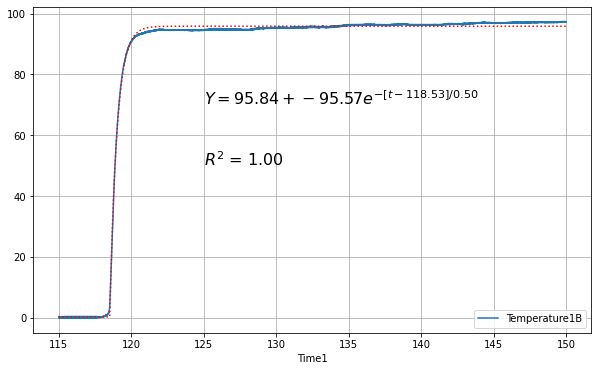

In [95]:
# Same as above but for the second probe
t = df_R1_c2h['Time1']
y = df_R1_c2h['Temperature1B']
# We don't worry about changing the first guess, since all that is different is tau, which it should find without help

# We can now call again the curve_fit. 
fittedParameter, variance = curve_fit(FirstOrderResponse, t, y, firstGuess)
print(fittedParameter)
y_est_1B = FirstOrderResponse(t,fittedParameter[0],fittedParameter[1],fittedParameter[2],fittedParameter[3])

import matplotlib.pyplot as plt
ax1 = df_R1_c2h[['Time1','Temperature1B']].plot(x='Time1', grid = True, figsize=(10, 6))
ax1 = plt.plot(t,y_est_1B, color = 'r', linestyle=':')
ax1 = plt.text(125, 70, r"$Y = %3.2f +  %3.2f e^{- [t - %3.2f] / %3.2f }$" % (fittedParameter[0],fittedParameter[1],fittedParameter[2],fittedParameter[3]), fontsize = 16)
ax1 = plt.text(125, 50, r"$R^2$ = %3.2f" % (np.corrcoef(y,y_est)[0,1])**2 , fontsize = 16)